In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import cv2
import PIL #image lib in python

2026-02-06 19:09:40.900880: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-06 19:09:42.273380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-06 19:09:45.521140: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


LOAD FLOWER DATASET

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
# this will convert the data_dir to a path object which is easier to work with
# we can use it to get the list of files in the directory and to read the images
print(data_dir)
ls=list(data_dir.glob('*/*/*.jpg'))
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)
print(ls[8:15])


datasets/flower_photos
3670
[PosixPath('datasets/flower_photos/flower_photos/tulips/9947385346_3a8cacea02_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/13531007054_c88deaf302_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/490541142_c37e2b4191_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/17309951996_552d632cbb_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/14122029097_3e3285ca5c_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/16282277874_b92776b194.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/13976206001_fd1c2cbd60.jpg')]


[PosixPath('datasets/flower_photos/flower_photos/roses/4625089819_55c45a189c.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/14312910041_b747240d56_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15236835789_6009b8f33d.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/5086249859_d066b37b8a_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/7186509956_c37c02fb43_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/5799616059_0ffda02e54.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/2535466143_5823e48b63.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/14880561916_79aeb812fd_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/4724951744_61877ec101_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/2960709681_e95

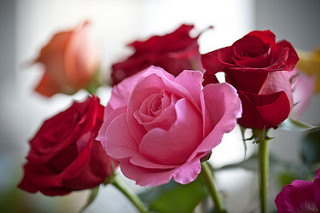

In [4]:
roses=list(data_dir.glob('*/roses/*.jpg'))
print(roses)
PIL.Image.open(str(roses[6]))

[PosixPath('datasets/flower_photos/flower_photos/tulips/100930342_92e8746431_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/13923539227_bdab038dc8.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/15082212714_ff87e8fcb1_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/3511776685_3635087b12_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/7166644048_b00a14f01b.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/8712263493_3db76c5f82.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/4571993204_5b3efe0e78.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/8697784345_e75913d220.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/9947385346_3a8cacea02_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/13531007054_c88deaf302_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/490541142_c37e2b4191_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/tulips/1730995

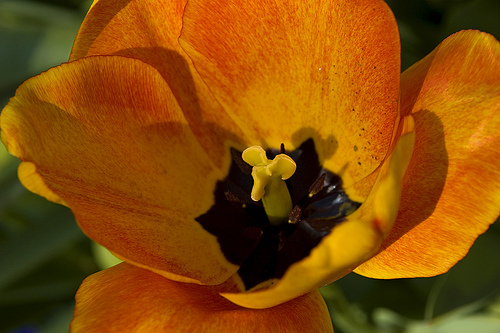

In [5]:
tulips=list(data_dir.glob('*/tulips/*.jpg'))
print(tulips)
PIL.Image.open(str(tulips[6]))

In [6]:
dict={
    'roses':list(data_dir.glob('*/roses/*.jpg')),
    'daisy':list(data_dir.glob('*/daisy/*.jpg')),
    'dandelion':list(data_dir.glob('*/dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('*/tulips/*.jpg'))
}
print(len(dict['daisy']))
flower_labesl={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

633


In [7]:
img=cv2.imread(str(dict['daisy'][0])) #cv2 reads the image as a numpy array
print(img)

[[[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [  4   6   6]
  [  6   9   7]
  [  8   9   5]]

 [[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [  6  11  10]
  [ 10  13  11]
  [  8  12   7]]

 [[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 10  15  14]
  [ 10  15  13]
  [  8  14   9]]

 ...

 [[119 117 107]
  [118 116 106]
  [117 115 105]
  ...
  [ 14  26  14]
  [ 14  26  14]
  [ 18  31  17]]

 [[115 113 105]
  [114 112 104]
  [114 112 104]
  ...
  [ 14  23  13]
  [ 18  27  17]
  [ 21  30  20]]

 [[113 111 103]
  [112 110 102]
  [112 110 102]
  ...
  [  6  13   6]
  [ 13  20  13]
  [ 20  24  19]]]


In [9]:
x,y=[],[]
for key in dict.keys():
    for img in dict[key]:
        image=cv2.imread(str(img))
        image=cv2.resize(image,(180,180)) #resize the image to 180x180
        x.append(image)
        y.append(flower_labesl[key])
print(y[:10])
x=np.array(x)#convert the list of images to a numpy array
y=np.array(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2936
2936
734
734


In [36]:
#normalize the data (scale the pixel values to be between 0 and 1)
x_train_scaled = np.array(x_train).astype('float32') / 255.0
x_test_scaled = np.array(x_test).astype('float32') / 255.0

# Convert labels to numpy arrays as well
y_train = np.array(y_train)
y_test = np.array(y_test)

# Debug: Check shapes and data types
print("x_train_scaled shape:", x_train_scaled.shape)
print("x_train_scaled dtype:", x_train_scaled.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)

x_train_scaled shape: (2936, 180, 180, 3)
x_train_scaled dtype: float32
y_train shape: (2936,)
y_train dtype: int64


In [37]:
#build the CNN
num_classes=len(flower_labesl)
cnn=Sequential([
    #cnn
    layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu'),#32 filtes with size 3x3 
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    layers.MaxPooling2D(),#2d array
    #dense layer
    layers.Flatten(),#1d array
    layers.Dense(128,activation='relu'),#128=64*2
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
            ,metrics=['accuracy']
    )
cnn.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30


2026-02-06 19:52:12.512601: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 1141516800 exceeds 10% of free system memory.


92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.3621 - loss: 1.4344
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 358ms/step - accuracy: 0.5954 - loss: 1.0170
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 364ms/step - accuracy: 0.6884 - loss: 0.8231
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 370ms/step - accuracy: 0.7701 - loss: 0.6102
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 354ms/step - accuracy: 0.8648 - loss: 0.3804
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - accuracy: 0.9332 - loss: 0.2052
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 366ms/step - accuracy: 0.9527 - loss: 0.1413
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.9830 - loss: 0.0664
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.9830 - loss: 0.0535
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 360ms/step - accuracy: 0.9762 - loss: 0.0808
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.9837 - loss: 0.0589
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 359ms/ste

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=cnn.predict(x_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
Confusion Matrix:
 [[ 68  12  24   6  40]
 [  7  89  11  11   8]
 [  7  20 121  18   6]
 [  2   7  13  97  10]
 [ 32  13  13  12  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.45      0.51       150
           1       0.63      0.71      0.67       126
           2       0.66      0.70      0.68       172
           3       0.67      0.75      0.71       129
           4       0.58      0.55      0.56       157

    accuracy                           0.63       734
   macro avg       0.63      0.63      0.63       734
weighted avg       0.63      0.63      0.62       734



In [1]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

NameError: name 'keras' is not defined

In [ ]:
#DATA augmentation is a technique to increase the size of the dataset by creating new images from the existing ones. It helps to prevent overfitting and improve the generalization of the model. We can use it in our CNN model by adding it as a layer before the convolutional layers.
num_class=5
cnn=Sequential([
    data_augmentation,#data augmentation layer
    layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu'),#32 filtes with size 3x3 
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    layers.MaxPooling2D(),#2d array
    layers.Dropout(0.2), #dropout 20 % layer to prevent overfitting
    #dense layer
    layers.Flatten(),#1d array
    layers.Dense(128,activation='relu'),#128=64*2
    layers.Dense(64,activation='relu'),
    layers.Dense(num_class, activation='softmax')
])